1. Importing essential libraries for data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# reading the abcnews data into a new dataframe df

df = pd.read_csv(r"C:\Users\yunus\Desktop\tulasi\abcnews.csv")

In [2]:
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [3]:
df.tail()

,publish_date,headline_text
1186013,20191231,vision of flames approaching corryong in victoria
1186014,20191231,wa police and government backflip on drug amne...
1186015,20191231,we have fears for their safety: victorian premier
1186016,20191231,when do the 20s start
1186017,20191231,yarraville shooting woman dead man critically ...


In [4]:
df.dtypes

publish_date      int64
headline_text    object
dtype: object

In [5]:
# renaming the column 'publish_date' as 'Date' for easy reading and understanding

df.rename({'publish_date' : 'Date'}, axis = 1, inplace =True)

In [6]:
df.head()

,Date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [7]:
# changing the data structure and date format from object to datetime

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [8]:
df.head()

,Date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


In [9]:
df.tail()

,Date,headline_text
1186013,2019-12-31,vision of flames approaching corryong in victoria
1186014,2019-12-31,wa police and government backflip on drug amne...
1186015,2019-12-31,we have fears for their safety: victorian premier
1186016,2019-12-31,when do the 20s start
1186017,2019-12-31,yarraville shooting woman dead man critically ...


In [10]:
df.dtypes

Date             datetime64[ns]
headline_text            object
dtype: object

In [11]:
# changing the data structure and date format from object to datetime

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [12]:
df.head()

,Date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


In [13]:
# changing the index to date as the values will be assigned or indexed based upon the Date not on numbers
# this is essential when we are doing the time series processing
# the indexed from Date has been saved in the new dataframe df2.

df2 = df.sort_values("Date")
df2 = df.set_index("Date")
df2.head()

,headline_text
Date,
2003-02-19,aba decides against community broadcasting lic...
2003-02-19,act fire witnesses must be aware of defamation
2003-02-19,a g calls for infrastructure protection summit
2003-02-19,air nz staff in aust strike for pay rise
2003-02-19,air nz strike to affect australian travellers


In [14]:
df2.tail()

,headline_text
Date,
2019-12-31,vision of flames approaching corryong in victoria
2019-12-31,wa police and government backflip on drug amne...
2019-12-31,we have fears for their safety: victorian premier
2019-12-31,when do the 20s start
2019-12-31,yarraville shooting woman dead man critically ...


In [15]:
# finding the null or empty cells in the dataset or dataframe

df2[df2.isnull().any(axis=1)]

,headline_text
Date,


In [16]:
# renaming the column 'headline_text' as 'headline' for easy reading and understanding

df2.rename({'headline_text' : 'headline'}, axis = 1, inplace =True)

In [17]:
df2.head()

,headline
Date,
2003-02-19,aba decides against community broadcasting lic...
2003-02-19,act fire witnesses must be aware of defamation
2003-02-19,a g calls for infrastructure protection summit
2003-02-19,air nz staff in aust strike for pay rise
2003-02-19,air nz strike to affect australian travellers


In [18]:
# finding the number of rows and columns in the dataframe
# we have found total 1186018 rows and 1 column as we have indexed 'Date' column

df2

,headline
Date,
2003-02-19,aba decides against community broadcasting lic...
2003-02-19,act fire witnesses must be aware of defamation
2003-02-19,a g calls for infrastructure protection summit
2003-02-19,air nz staff in aust strike for pay rise
2003-02-19,air nz strike to affect australian travellers
...,...
2019-12-31,vision of flames approaching corryong in victoria
2019-12-31,wa police and government backflip on drug amne...
2019-12-31,we have fears for their safety: victorian premier


In [19]:
# the most important step in this data processing is to extract the words which is related to 'weather'
# we have found below words which are related to weather, so we are extracting these words from the dataframe
# and the only data which have these words will be remained and other data will be removed


cols_to_filter = ['headline']
search_values = ['rain', 'storm', 'hurricane', 'thunder', 'snow', 'global warming', 'greenhouse gas', 'forest fire','heat wave',
                 'natural disaster', 'flood', 'stock', 'stock price', 'fossil fuel', 'fuel price', 'rising temperature',
                 'tsunami', 'carbon emission', 'summer', 'winter', 'NASDAQ', 'financial crisis', 'climate change', 'bad climate',
                 'flooding', 'climate summit', 'pollution', 'winds', 'air quality', 'emission norms', 'ice melting', 'tornado',
                 'glacier melting', 'oil price', 'oil', 'stock exchange', 'crude oil','weather','heatwave', 
                 'raining','tidal wave','weather changes','drought','water scarcity']

patt = '|'.join(search_values)

mask = df2[cols_to_filter].apply(lambda x: x.str.contains(patt)).any(1)


In [20]:
# masking these extracted data which has weather words, the data from 1186018 data rows, 60956 data has been extracted

df2[mask]

,headline
Date,
2003-02-19,expressions of interest sought to build livestock
2003-02-19,nsw opp pledges 50m drought relief
2003-02-19,rain eases wheatbelt water woes
2003-02-19,resource stocks boost all ords
2003-02-19,restraint order issued against anti discrimina...
...,...
2019-12-30,dust storm at blanchetown
2019-12-31,iraq protesters storm us embassy in baghdad af...
2019-12-31,north west victoria record low rainfall


In [21]:
# the new data has been saved into new_df dataframe

new_df = df2[mask]

In [22]:
new_df

,headline
Date,
2003-02-19,expressions of interest sought to build livestock
2003-02-19,nsw opp pledges 50m drought relief
2003-02-19,rain eases wheatbelt water woes
2003-02-19,resource stocks boost all ords
2003-02-19,restraint order issued against anti discrimina...
...,...
2019-12-30,dust storm at blanchetown
2019-12-31,iraq protesters storm us embassy in baghdad af...
2019-12-31,north west victoria record low rainfall


In [23]:
#pip install vader

In [24]:
# importing the vader sentiment packages for sentiment analysis

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yunus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
# finding out the sid_polarity score from the text
# sentiment analysis is a text analysis method that detects polarity (e.g positive or negative opinion )
# within text or sentense or paragraph

get_ipython().run_cell_magic('time', '', 'title_score = [sid.polarity_scores(sent) for sent in new_df.headline]')

Wall time: 4.89 s


In [26]:
# length of the total data

len(title_score)

60956

In [27]:
new_df.headline[0:10].values

array(['expressions of interest sought to build livestock',
       'nsw opp pledges 50m drought relief',
       'rain eases wheatbelt water woes',
       'resource stocks boost all ords',
       'restraint order issued against anti discrimination',
       'snowtown murder trial delayed',
       'vff to buy stock feed pellets for fire affected',
       'bad weather might have caused iranian plane crash',
       'bushfire coronial inquiry winds up',
       'canegrowers hope for late summer rain'], dtype=object)

In [28]:
# final score of sentiment analysis including negative, neutral, positive and compound

title_score[0:10]

[{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4588},
 {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.4767},
 {'neg': 0.354, 'neu': 0.366, 'pos': 0.28, 'compound': -0.1531},
 {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.4019},
 {'neg': 0.315, 'neu': 0.685, 'pos': 0.0, 'compound': -0.3182},
 {'neg': 0.767, 'neu': 0.233, 'pos': 0.0, 'compound': -0.765},
 {'neg': 0.364, 'neu': 0.636, 'pos': 0.0, 'compound': -0.4588},
 {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.7351},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}]

In [29]:
# adding these new sentiment scores into each and every individual values (appending)


compound=[]
neg=[]
neu=[]
pos=[]

for i in range(len(title_score)):
    compound.append(title_score[i]['compound'])
    neg.append(title_score[i]['neg'])
    neu.append(title_score[i]['neu'])
    pos.append(title_score[i]['pos'])

In [30]:
len(compound)

60956

In [31]:
len(neg)

60956

In [32]:
len(neu)

60956

In [33]:
len(pos)

60956

In [34]:
# adding these values into dataframe as new columns


new_df['compound'] = compound
new_df['neg'] = neg
new_df['neu'] = neu
new_df['pos'] = pos

C:\Users\yunus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\yunus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\yunus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [35]:
new_df.head()

,headline,compound,neg,neu,pos
Date,,,,,
2003-02-19,expressions of interest sought to build livestock,0.4588,0.000,0.667,0.333
2003-02-19,nsw opp pledges 50m drought relief,0.4767,0.000,0.617,0.383
2003-02-19,rain eases wheatbelt water woes,-0.1531,0.354,0.366,0.280
2003-02-19,resource stocks boost all ords,0.4019,0.000,0.597,0.403
2003-02-19,restraint order issued against anti discrimina...,-0.3182,0.315,0.685,0.000


In [36]:
# saving this dataframe into a dataset called "abc-sentiment.csv"

new_df.to_csv(r'C:\Users\yunus\Desktop\tulasi\abc-sentiment.csv')

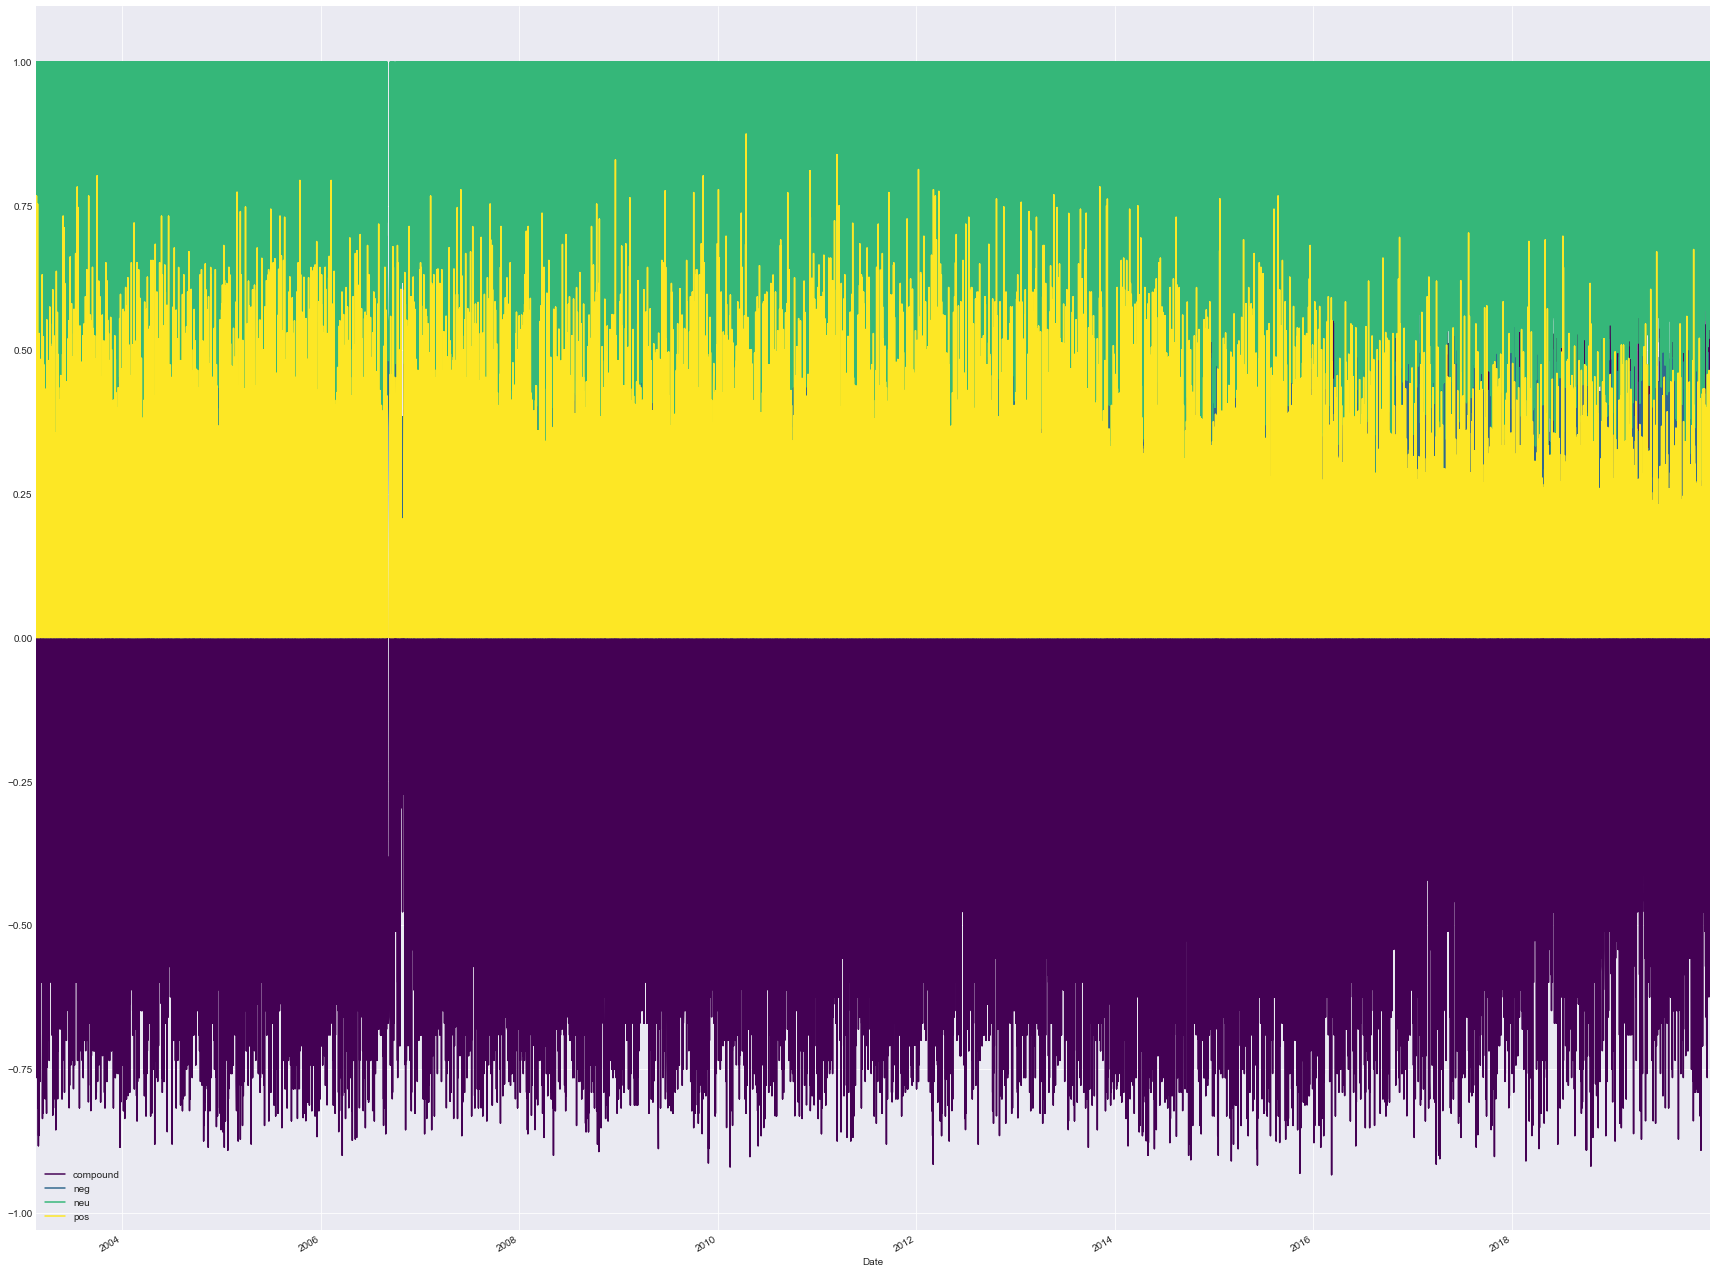

In [37]:
# plotting the graph of dataframe using matplotlib


plt.style.use('seaborn-dark')

new_df.plot(cmap= "viridis",figsize=(30,25))
plt.grid()
plt.show()